# PERFORMANCE ANALYSIS OF A TURBOJET ENGINE

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Experimental Data**

In [119]:
turbojet_df = pd.read_excel('turbojet raw data 1.xlsx',header=4)

In [120]:
turbojet_df

,RPM*1000/min,Compressor Inlet Temperature (°C),Compressor Inlet absolute Pressure (bar),Compressor Exit Temerature (°C),Combustion Chamber Exit Temperature (°C),Combstion Chamber Exit Gauge Pressure (bar),Turbine Exit Temperature (°C),Fuel Flow Rate (L/h),Air Flow Rate (L/s),Thrust (N)
0,30.0,14,1.01325,24,854,0.06,571,5.5,38,7
1,60.0,14,1.01325,40,844,0.19,568,9.0,60,18
2,75.0,14,1.01325,49,850,0.36,565,11.5,76,26
3,92.8,14,1.01325,72,877,0.62,572,15.9,114,45
4,96.0,14,1.01325,87,913,0.77,580,17.0,140,55


## Unit conversion

In [121]:
rho_air = 1.2   # kg/m3
rho_fuel = 840  # kg/m3
gamma_cold = 1.4
gamma_hot = 1.33
Cp_cold = 1005  # J/kg/K
Cp_hot = 1150   # J/kg/K

In [122]:
turbojet_df_unit_converted = turbojet_df.copy()
turbojet_col = turbojet_df_unit_converted.columns

>### **Temprature : °C to kelvin**
>### **Pressure : bar to kPa**
>### **Mass flow rate : L/h or L/s to kg/s**

In [123]:
for i in turbojet_col:
    if "(°C)" in i:
        turbojet_df_unit_converted[i] = turbojet_df_unit_converted[i] + 273
        turbojet_df_unit_converted = turbojet_df_unit_converted.rename(
            columns={i: i.replace('(°C)', '(K)')})
    elif "(bar)" in i:
        turbojet_df_unit_converted[i] = turbojet_df_unit_converted[i]*100
        turbojet_df_unit_converted = turbojet_df_unit_converted.rename(
            columns={i: i.replace('(bar)', '(kPa)')})
    elif "(L/h)" in i:
        turbojet_df_unit_converted[i] = turbojet_df_unit_converted[i] * \
            rho_fuel/(3600*1000)
        turbojet_df_unit_converted = turbojet_df_unit_converted.rename(
            columns={i: i.replace('(L/h)', '(kg/s)')})
    elif "(L/s)" in i:
        turbojet_df_unit_converted[i] = turbojet_df_unit_converted[i] * \
            rho_air/(1000)
        turbojet_df_unit_converted = turbojet_df_unit_converted.rename(
            columns={i: i.replace('(L/s)', '(kg/s)')})


In [124]:
turbojet_df_unit_converted

,RPM*1000/min,Compressor Inlet Temperature (K),Compressor Inlet absolute Pressure (kPa),Compressor Exit Temerature (K),Combustion Chamber Exit Temperature (K),Combstion Chamber Exit Gauge Pressure (kPa),Turbine Exit Temperature (K),Fuel Flow Rate (kg/s),Air Flow Rate (kg/s),Thrust (N)
0,30.0,287,101.325,297,1127,6.0,844,0.001283,0.0456,7
1,60.0,287,101.325,313,1117,19.0,841,0.002100,0.0720,18
2,75.0,287,101.325,322,1123,36.0,838,0.002683,0.0912,26
3,92.8,287,101.325,345,1150,62.0,845,0.003710,0.1368,45
4,96.0,287,101.325,360,1186,77.0,853,0.003967,0.1680,55


>## **Ambient conditions**

In [125]:
P01 = turbojet_df_unit_converted['Compressor Inlet absolute Pressure  (kPa)']   # kPa
T01 = turbojet_df_unit_converted['Compressor Inlet Temperature  (K) ']       # kelvin

> ## **Compressor Pressure Ratio**

In [126]:
T02 = turbojet_df_unit_converted['Compressor Exit Temerature (K)']

In [127]:
T02byT01 = T02/T01

In [128]:
CPR = pow(T02byT01,(gamma_cold/(gamma_cold-1)))

In [129]:
P02 = CPR*P01 + P01

In [130]:
P03 = turbojet_df_unit_converted['Combstion Chamber Exit Gauge  Pressure (kPa)'] + P01

> ## **Compressor efficiency (Ƞ𝒄)**
$$\eta_c = \frac{(\frac{P_{02}}{P_{01}})^{(\frac{\gamma -1 }{\gamma})}-1}{\frac{T_{02}}{T_{01}}-1}$$

In [148]:
etaC = ((pow(CPR,((gamma_hot-1)/gamma_hot))-1)/(T02byT01 - 1))

> ## **Global Equivalence ratio (ɸg)**
$$Global\space Equivalence\space Ratio = \frac{𝐴𝑐𝑡𝑢𝑎𝑙 (\frac{𝐹𝑢𝑒𝑙}{𝐴𝑖𝑟})}{𝑆𝑡𝑜𝑖𝑐ℎ𝑖𝑜𝑚𝑒𝑡𝑟𝑖𝑐 (\frac{𝐹𝑢𝑒𝑙}{𝐴𝑖𝑟})}$$

In [132]:
mfByma_stochio = 1/15
mf_actual = turbojet_df_unit_converted['Fuel Flow Rate (kg/s)']
ma_actual = turbojet_df_unit_converted['Air Flow Rate (kg/s)']
mfByma_actual = mf_actual/ma_actual

In [133]:
GER = mfByma_actual/mfByma_stochio

> ## **Specific Thrust**
$$𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐 𝑇ℎ𝑟𝑢𝑠𝑡=\space \frac{𝑇ℎ𝑟𝑢𝑠𝑡 (𝑁𝑒𝑤𝑡𝑜𝑛𝑠)}{𝑇𝑜𝑡𝑎𝑙\space 𝐼𝑛𝑡𝑎𝑘𝑒\space 𝐴𝑖𝑟\space 𝐹𝑙𝑜𝑤 (\frac{𝑘𝑔}{𝑠})}$$

In [134]:
thrust = turbojet_df_unit_converted['Thrust             (N)']
SpecificThrust = thrust/ma_actual

> ## **Thrust Specific Fuel Consumption (TSFC)**
$$𝑇𝑆𝐹𝐶 =\space \frac{𝐹𝑢𝑒𝑙\space 𝐶𝑜𝑛𝑠𝑢𝑚𝑝𝑡𝑖𝑜𝑛 (\frac{𝑘𝑔}{𝑠})}{𝑇ℎ𝑟𝑢𝑠𝑡 (𝑁𝑒𝑤𝑡𝑜𝑛𝑠)}$$

In [135]:
TSFC = mf_actual/thrust

> ## **Mach Number**

1. inlet velocity

In [143]:
R = 287
ue = thrust/(ma_actual + mf_actual)
a = np.sqrt(gamma_hot*R*turbojet_df_unit_converted['Turbine Exit Temperature (K)'])
Mach = ue/a

# **Results**

In [149]:
res_df = pd.DataFrame({
    "RPM*1000/min":turbojet_df_unit_converted['RPM*1000/min'],
    "Compressor pressure ratio(P02/P01)": CPR,
    "Compressor efficiency (Ƞ𝒄)" : etaC,
    "Global equivalence ratio (ɸg)" : GER,
    "Specific thrust" : SpecificThrust,
    "TSFC" : TSFC,
    "Mach No." : Mach
})
res_df

,RPM*1000/min,Compressor pressure ratio(P02/P01),Compressor efficiency (Ƞ𝒄),Global equivalence ratio (ɸg),Specific thrust,TSFC,Mach No.
0,30.0,1.127356,0.866456,0.422149,153.508772,0.000183,0.263052
1,60.0,1.354623,0.863414,0.437500,250.000000,0.000117,0.428736
2,75.0,1.495922,0.861755,0.441338,285.087719,0.000103,0.489662
3,92.8,1.904497,0.857671,0.406798,328.947368,0.000082,0.563910
4,96.0,2.210406,0.855120,0.354167,327.380952,0.000072,0.560502


# **Plots**

In [151]:
x = res_df['RPM*1000/min']
y = res_df[res_df.columns[1:]]

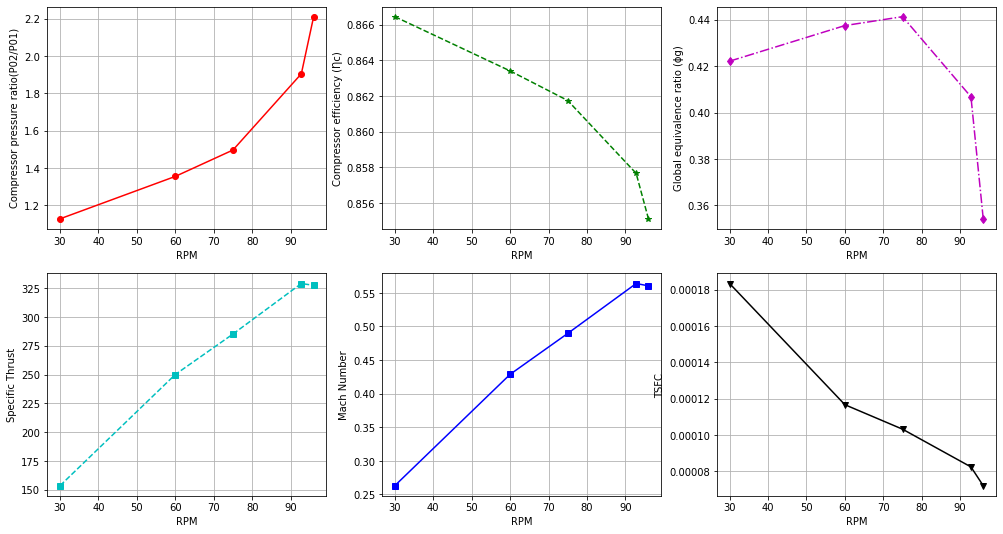

In [152]:
plt.figure(figsize=(17,9));
plt.subplot(231)
plt.plot(x,y[y.columns[0]],"-ro");plt.grid();plt.xlabel("RPM");plt.ylabel("Compressor pressure ratio(P02/P01)");
plt.subplot(232)
plt.plot(x,y[y.columns[1]],"--g*");plt.grid();plt.xlabel("RPM");plt.ylabel("Compressor efficiency (Ƞc)");
plt.subplot(233)
plt.plot(x,y[y.columns[2]],"-.md");plt.grid();plt.xlabel("RPM");plt.ylabel("Global equivalence ratio (ɸg)");
plt.subplot(234)
plt.plot(x,y[y.columns[3]],"--cs");plt.grid();plt.xlabel("RPM");plt.ylabel("Specific Thrust");
plt.subplot(235)
plt.plot(x,y[y.columns[5]],"-bs");plt.grid();plt.xlabel("RPM");plt.ylabel("Mach Number");
plt.subplot(236)
plt.plot(x,y[y.columns[4]],"-kv");plt.grid();plt.xlabel("RPM");plt.ylabel("TSFC");

## **Temprature trends with RPM**

In [140]:
temp_col = []
for i in turbojet_df_unit_converted.columns:
    if "(K)" in i:
        temp_col.append(i)
temprature = turbojet_df_unit_converted[temp_col]

In [141]:
temprature

,Compressor Inlet Temperature (K),Compressor Exit Temerature (K),Combustion Chamber Exit Temperature (K),Turbine Exit Temperature (K)
0,287,297,1127,844
1,287,313,1117,841
2,287,322,1123,838
3,287,345,1150,845
4,287,360,1186,853


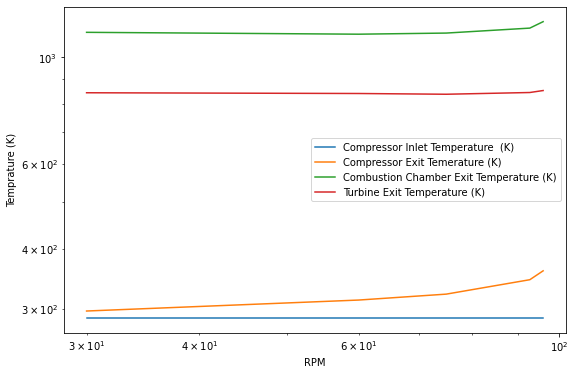

In [142]:
plt.figure(figsize=(9,6));
for i in temprature.columns:
    plt.plot(x,temprature[i]);
plt.loglog();plt.xlabel("RPM");plt.ylabel("Temprature (K)");
plt.legend(temprature.columns.tolist());